# Learn ML : Linear Regression with Gradient Descent ( Scratch )
Study Link :  

In [ ]:
# Imports

# For Mathematical Operations
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
plt.style.use('fivethirtyeight')
# figure size in inches
rcParams['figure.figsize'] = 11.7,5.27

In [ ]:
height = np.array([150, 160, 155, 173, 180, 169]) 
weight = np.array([48, 63, 60, 67, 72, 66])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Height vs Weight')

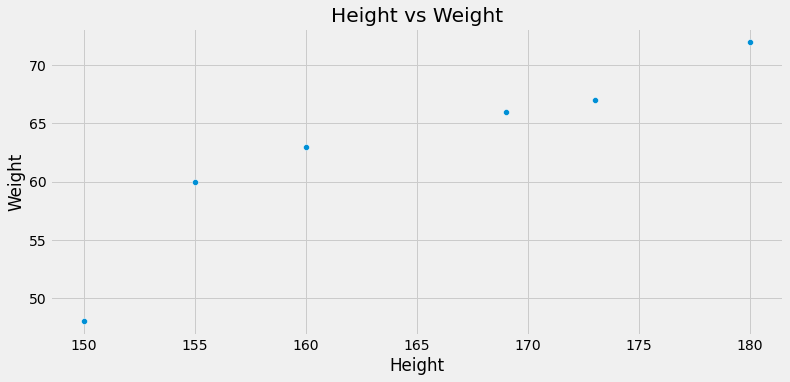

In [ ]:
sns.scatterplot(height, weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")

## Naive Idea 1 : Mean Value

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


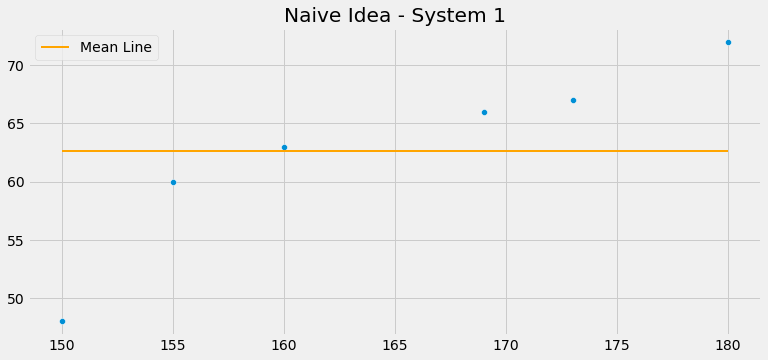

In [ ]:
sns.lineplot(x=height, y=[weight.mean()]*len(weight), lw=2, color="orange")
sns.scatterplot(height, weight)
plt.legend(["Mean Line"])
plt.title("Naive Idea - System 1")
plt.show()

## Basic Scale Down 

In [ ]:
# Idea2 : Basic scale down

def system(h):
  return h/3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


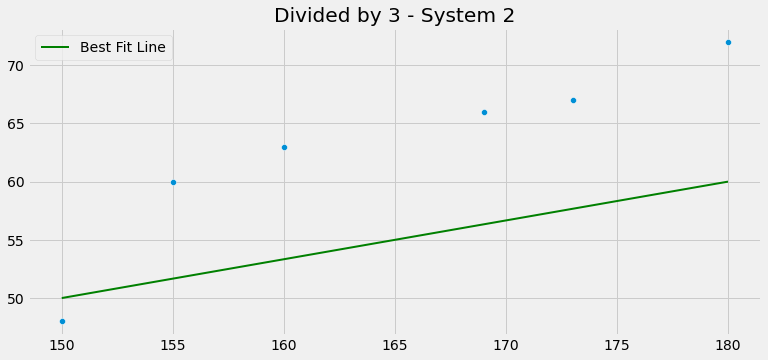

In [ ]:
sns.lineplot(x=height, y=[_h/3 for _h in height], lw=2, color="green")
sns.scatterplot(height, weight)
plt.legend(["Best Fit Line"])
plt.title("Divided by 3 - System 2")
plt.show()

Error Function: MSE

In [ ]:
def mse(y, y_hat):
  return np.mean((y - y_hat)**2)

In [ ]:
# Random search
x = height
y = weight
for temp_m in zip(np.linspace(0, 1, num=100)):
  for temp_c in np.linspace(0, 1, num=100):
    line = temp_m*x + temp_c
    print(temp_m, "error", mse(weight, line))

Streaming output truncated to the last 5000 lines.
(0.5050505050505051,) error 428.179131381152
(0.5050505050505051,) error 428.59164030881243
(0.5050505050505051,) error 429.004353297283
(0.5050505050505051,) error 429.4172703465636
(0.5050505050505051,) error 429.83039145665447
(0.5050505050505051,) error 430.24371662755544
(0.5050505050505051,) error 430.65724585926654
(0.5050505050505051,) error 431.0709791517877
(0.5050505050505051,) error 431.484916505119
(0.5050505050505051,) error 431.89905791926043
(0.5050505050505051,) error 432.31340339421195
(0.5050505050505051,) error 432.7279529299737
(0.5050505050505051,) error 433.14270652654545
(0.5050505050505051,) error 433.55766418392733
(0.5050505050505051,) error 433.9728259021194
(0.5050505050505051,) error 434.3881916811215
(0.5050505050505051,) error 434.80376152093385
(0.5050505050505051,) error 435.2195354215562
(0.5050505050505051,) error 435.6355133829887
(0.5050505050505051,) error 436.0516954052314
(0.5050505050505051,) e

### Keeping C as constant and changing m values

In [ ]:
c = 1
error_val = []
temp_m_vals = np.linspace(0, 1, num=100)

for temp_m in zip(temp_m_vals):
    line = temp_m*x + c
    error_val.append(mse(weight, line))

Text(0.5, 0, 'Random Model Values')

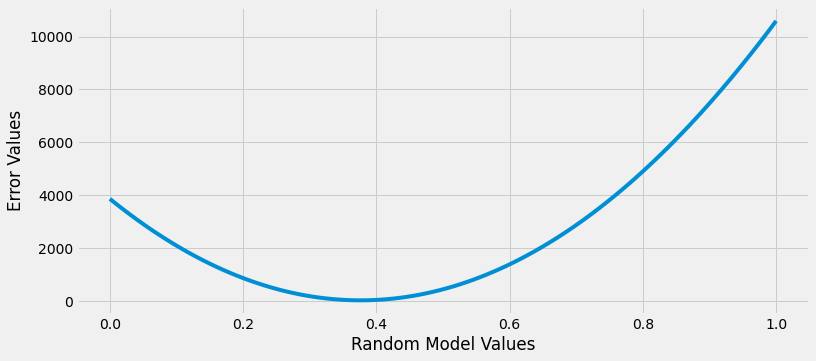

In [ ]:
plt.plot(temp_m_vals, error_val)
plt.ylabel("Error Values")
plt.xlabel("Random Model Values")

In [ ]:
# Model Weights
m = 0.1
c = 0.1

# Hyperparameters
learning_rate = 0.001 # The learning Rate 0.1, 0.001, 0.0001 # adaptive lr
epochs = 30000 # The number of iterations to perform gradient descent

def normalize(x):
  x = (x - min(x))/(max(x)-min(x))
  return x

x = normalize(height)
y = normalize(weight)

n = len(x)
error_vals = []

# Performing Gradient Descent
for i in range(epochs):
  # Forward propagation (basically multiplication)
  y_hat = m*x + c # The current predicted value of Y

  # Calculate Mean Squared Error
  error_vals.append(mse(y, y_hat))

  # Find the Gradients
  de_dm = (-2/n) * np.sum(x * (y - y_hat)) # Derivative of error function wrt m
  de_dc = (-2/n) * np.sum(y - y_hat) # Derivative of error function wrt c

  # Back propagation (update the weights)
  m = m - (de_dm * learning_rate)
  c = c - (de_dc * learning_rate)

In [ ]:
print ("Intercept", c)
print ("Slope", m)

Intercept 0.21166626013465292
Slope 0.8266102334220019


## Comparing with Sklearn Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
train_df = pd.DataFrame({'x': x})
X = train_df[['x']]
y = y

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [ ]:
reg.coef_, reg.intercept_

array([0.82823259])

In [ ]:
# Our Scatch Implementation
print(f"From Scratch M {m}, C {c}")
print(f"From sklearn module M {reg.coef_[0]} C {reg.intercept_}")

From Scratch M 0.8266102334220019, C 0.21166626013465292
From sklearn module M 0.8282325937260901 C 0.2107986908101675
